# Reading and interrogating data
After making a telescope, pointing it at something interesting and recording data, we want to analyse it to get some science out of it. The first step to that in modern astronomy is to read that data into a computer. Even within `python`, there are a number of ways of doing that. Often data is written in a bespoke manner, so it's worth knowing a few tricks for reading in data We'll start with the basics, and then concentrate on using the `pandas` package to read and plot a real astronomical data set.

Perhaps the simplest data set is are numbers stored in a text file. In this directory, you will find a text file called `simple_data1.txt`. We'll first read the data in the file using `numpy`:

In [1]:
import numpy as np

data = np.genfromtxt('simple_data1.txt')

print("Data type = ", type(data))
print("Data shape = ", data.shape)
print(data)

Data type =  <class 'numpy.ndarray'>
Data shape =  (3, 3)
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


The `loadtxt` function has returned a 2-dimensional `array` based on the data in the text file. We have printed this out, and found the shape to be three by three, using the `.shape` attribute of the data `array`. We can access elements of the array just like a 1D array, but now we need two indexes to specify a location (kind of like an $x,y$ coordinate). Both axis are zero indexed, so we access the first element of the array like this `data[0,0]`.

If we think of the horizontal direction as `x`, and the vertical as `y`, the indexing works like this:

$$
\begin{array}{ccc} 
[[y_0,x_0 & y_0,x_1 & y_0,x_2] \\ 
[y_1,x_0 & y_1,x_1 & y_1,x_2] \\ 
[y_2,x_0 & y_2,x_1 & y_2,x_2]] \\ 
\end{array} 
$$

We'll talk more about 2D arrays in a future notebook.

In this simple case we were able to easily read in the data. What happens if we have column headings in our text file however? We can pass set the `names` arguement to `True`, which will read the first line as column headers. We can then access specific columns by name:

In [2]:
data = np.genfromtxt('simple_data2.txt',names=True)
print(data)
print(data['Column2'])

[(0., 1., 2.) (3., 4., 5.) (6., 7., 8.)]
[1. 4. 7.]


What happens if we add in some text to our data? Try running the box below:

In [3]:
data = np.genfromtxt('simple_data3.txt',names=True)
print(data)

[(0., 1., 2., nan) (3., 4., 5., nan) (6., 7., 8., nan)]


Without help from us, `genfromtxt` is trying to read all columns in a floats. `nan` means "not a number", and is a kind of place-holder for a computer when something has gone wrong. Although we can fiddle with `genfromtxt` to read in this data correctly, we're going to use a different package, called `pandas`. Let's give it a whirl:

In [4]:
import pandas as pd
##A csv file is a "comma separated value" text file. This text file
##is separated by spaces, so we have to tell pandas to use a space
##to separate values, using the 'delimiter'
df = pd.read_csv('simple_data3.txt',delimiter=' ')

##print out some interesting things
##in the below, I want to space out some of the outputs.
##The '\n' is called a 'newline' escape sequence, and
##has the same effect as pressing the enter button on your
##keyboard when typing text
print('What are we working with now?')
print(type(df),'\n')

print('The data frame looks like this:')
print(df,'\n')

print('Check what columns were titled automagically: ')
print(df.columns,'\n')

print('Try accessing a single column by name: ')
print(df['Column1'],'\n')



What are we working with now?
<class 'pandas.core.frame.DataFrame'> 

The data frame looks like this:
   Column1  Column2  Column3  Column4
0        0        1        2    'red'
1        3        4        5  'green'
2        6        7        8   'blue' 

Check what columns were titled automagically: 
Index(['Column1', 'Column2', 'Column3', 'Column4'], dtype='object') 

Try accessing a single column by name: 
0    0
1    3
2    6
Name: Column1, dtype: int64 



So `pandas` has read the data into a Class called a data frame (`df`), which has many nice features to easily access, manipulate, and visualise the data. Let's check out some of the functionality using some real data.

## GAMA data
The Galaxy And Mass Assembly (GAMA) survey is an optical survey, which collected spectra and redshifts of more than 100,00 galaxies (check out a paper from [Driver et al 2011](https://ui.adsabs.harvard.edu/abs/2011MNRAS.413..971D/abstract) for a more detailed explanation. I downloaded data for 1000 of those galaxies from [here](https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=J/MNRAS/413/971/gamacore&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa), and saved it as `GAMA_data.tsv`. Let's load it into a data frame and see what we have:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
##This particular data set came separated by the colon character, so select that
df = pd.read_csv('GAMA_data.tsv',delimiter=';')

print('Check what columns were titled automagically: ')
print(df.columns,'\n')

Check what columns were titled automagically: 
Index(['GAMA', 'RAJ2000', 'DEJ2000', 'rPmag', 'zh', 'q_zh', 'G', 'Sp', 'ph',
       'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Jmag', 'Kmag', 'rSmag',
       'Sloan', 'DR6', 'SDSS-ID', 'ZID'],
      dtype='object') 



First of all, let's look where on the sky our sample of galaxies lie by plotting their RA/Dec coordinates. A dataframe Class has a plotting attribute, so let's use that:

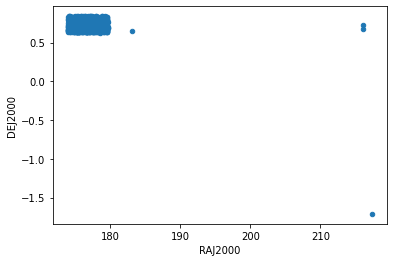

In [9]:
df.plot(x='RAJ2000', y='DEJ2000',kind='scatter')
plt.show()

Ok, so we have a large concentration of galaxies at a Declination of just above 0.5 degrees, with a few outliers. Let's say we didn't care about those galaxies away from the main group. We can get rid of them using array indexing like we would with a `numpy` array. The syntax below says "only include rows where the value of `RAJ2000` is less than 181.0 degrees", and we assign the cropped data frame the name `cropped_df`:

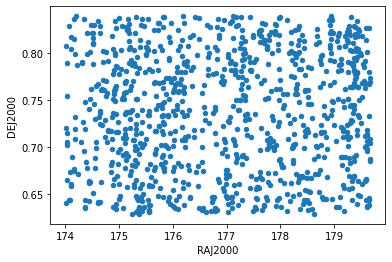

In [10]:
cropped_df = df[df.RAJ2000 < 181.0]
cropped_df.plot(x='RAJ2000', y='DEJ2000',kind='scatter')
plt.show()

The neat thing about this, is that we've cropped the data based on the `RAJ2000` value, but cropped the entire data frame object, meaning all columns have been cropped in the same way.

Ok, let's check out some other properties of the data. The column called `zh` stands for Heliocentric redshift. Let's look at the range of values using a histogram:

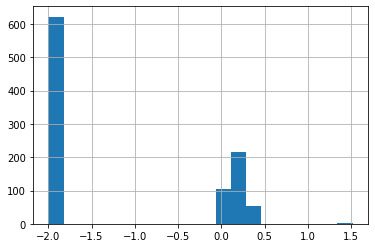

In [11]:
##The bins argument sets the number of bins to bine the data into
cropped_df['zh'].hist(bins=20)
plt.show()

Right, well redshift is a measure of distance, and can't be negative, so what's going on here? It turns out if a redshift was 'embargoed' in this data, it was give a value of -2.0. Let's do something about this.

## <font color=blue>Exercise 2.1<font>
Plot a histogram of the 'zh' column, excluding any negative values. Use the box below.
<font color=red>Optional extension:<font> set the axis labels for your plot

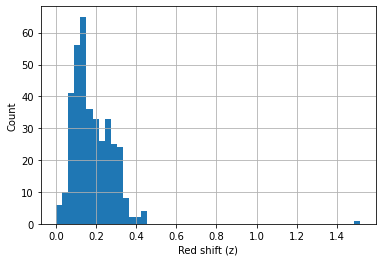

In [12]:
ax = cropped_df[cropped_df['zh'] > 0].zh.hist(bins=50)
ax.set_xlabel('Red shift (z)')
ax.set_ylabel('Count')
plt.show()

Another neat trick is to group the data by a certain variable using the `group` function. There is a column called `G`, where the objects were grouped by spectrum. First of all, we can check for all the unique values in G: 

In [13]:
import numpy as np
print(df['G'].unique())

['  ' '12' '15']


So for these 1000 galaxies, we see `G` is either blank, 12, or 15. We can plot any colum, grouped by it's `G` value, using this command:

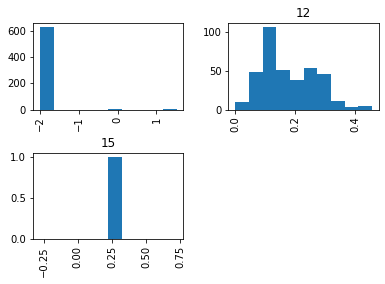

In [14]:
df['zh'].hist(by=df['G'])
plt.show()

## <font color=blue>Exercise 2.2<font>
Plot histograms of the `rPmag` column, grouped by the column `G`.See if you can infer a correlation between magnitude and group. <font color=red>Optional extension:<font> explicitly set the bins to be the same for all the histograms, to make it easier to compare the grouped data.

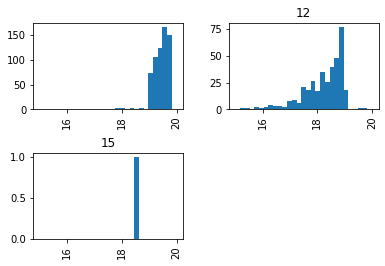

In [15]:
df['rPmag'].hist(by=df['G'],bins=np.linspace(15,20,30))
plt.show()

## GLEAM data
The GaLactic and Extragalactic All-sky Murchison Widefield Array (GLEAM) survey catalogue (see [Hurley-Walker et al. 2017](https://academic.oup.com/mnras/article/464/1/1146/2280761) is a collection of low radio-frequency sources in the southern hemisphere. A typical data format that you will encounter in astronomy is the FITS standard (brief Wikipedia overview [here](https://en.wikipedia.org/wiki/FITS#:~:text=Flexible%20Image%20Transport%20System%20(FITS,digital%20file%20format%20in%20astronomy.) )), but we can read FITS files into `pandas` by using the `astropy` package. `astropy` is an extremely useful package that we will use later in the course. I have cropped the GLEAM catalogue (which should have > 300,000 sources) to make it smaller and easier to download. To look at the GLEAM data, first of all, let's read it into a data frame:

In [16]:
##The GLEAM FITS file is formatted as a table, so use
##the astropy.table functionality
from astropy.table import Table

##Read the table in to return an astropy Table object
dat = Table.read('GLEAM_cat_cropped.fits')

##The Table Class has a handy attribute to form a data frame
df = dat.to_pandas()

That's it! We've loaded our FITS table file into a pandas data frame, so now let's see what's inside:

In [17]:
for column in df.columns:
    print(column)

GLEAM
RAJ2000
DEJ2000
Fintwide
awide
bwide
pawide
Fint076
Fint084
Fint092
Fint099
Fint107
Fint115
Fint122
Fint130
Fint143
Fint151
Fint158
Fint166
Fint174
Fint181
Fint189
Fint197
Fint204
Fint212
Fint220
Fint227
alpha


This reduced version of the catalogue includes the source position (RA, Dec), the flux density (brightness) of the source as a function of frequency, and the size of the source on the sky. The size of the source is described by fitting a two dimensional elliptical Gaussian to the radio image, yielding a size measured by the semi-major (labelled $a$) and semi-minor ($b$) axes (image credit By M. W. Toews - Own work, CC0, [link](https://commons.wikimedia.org/w/index.php?curid=56897423)):

<img src="Ellipse_semi-major_and_minor_axes.svg" width="400">

Here is an explanation of the columns:

| Column Name | Meaning
| :-: | :-: |
| GLEAM | Source name |
| RAJ2000 | Right Ascension (deg) |
| DEJ2000 | Declination (deg) |
| Fintwide | Flux density integrated over frequencies (Jy,centred at 200MHz) |
| awide | Elliptical-gaussian Major axis (centred at 200MHz) |
| bwide | Elliptical-gaussian Minor axis (centred at 200MHz) |
| pawide | Elliptical-gaussian position angle |
| Fint076 | Flux density at 076 MHz |
| Fint084 | Flux density at 084 MHz |
| Fint092 | Flux density at 092 MHz |
| Fint099 | Flux density at 099 MHz |
| Fint107 | Flux density at 107 MHz |
| Fint115 | Flux density at 115 MHz |
| Fint122 | Flux density at 122 MHz |
| Fint130 | Flux density at 130 MHz |
| Fint143 | Flux density at 143 MHz |
| Fint151 | Flux density at 151 MHz |
| Fint158 | Flux density at 158 MHz |
| Fint166 | Flux density at 166 MHz |
| Fint174 | Flux density at 174 MHz |
| Fint181 | Flux density at 181 MHz |
| Fint189 | Flux density at 189 MHz |
| Fint197 | Flux density at 197 MHz |
| Fint204 | Flux density at 204 MHz |
| Fint212 | Flux density at 212 MHz |
| Fint220 | Flux density at 220 MHz |
| Fint227 | Flux density at 227 MHz |
| alpha | Fitted spectral index |

Ok, let's have a look at some of the data!

## <font color='blue'>Exercise 2.3 <font>
Plot the `RAJ2000` vs the `DEJ2000` columns on a scatter plot to see where on the sky our sources lie. Also plot a histogram of the fitted spectral index values. You should see a strip of sky where there are no sources - can you guess what that area is? (Or you could read the GLEAM paper to find out).

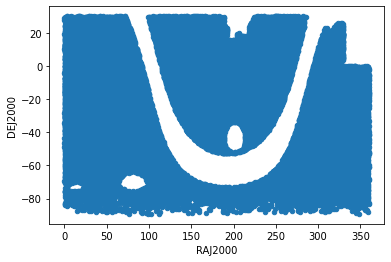

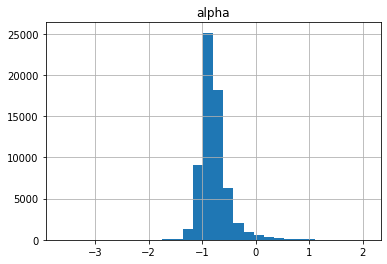

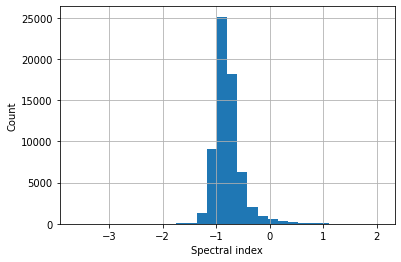

In [18]:
##plot RA vs DEC
df.plot(x='RAJ2000', y='DEJ2000',kind='scatter')
plt.show()

##quick histogram of the spectral index
df.hist('alpha',bins=30)
plt.show()

##Alternatively
ax = df.alpha.hist(bins=30)
ax.set_xlabel('Spectral index')
ax.set_ylabel('Count')
plt.show()

As a reminder from the last notebook, the spectral index is defined via this equation:

$$ S = S_0\nu^\alpha $$

where $S$ is the flux density (how bright it appears, measured in Jy), $S_0$ is a reference flux density, $\nu$ is the frequency, and $\alpha$ is the spectral index of the source. Next, we'll see how to make a new column based on the data to see if sources with a positive spectral index are special

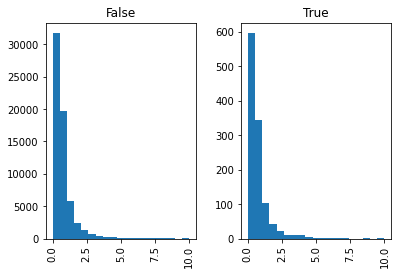

In [20]:
##Create a new column, called 'positive_alpha', where that column
##is True when alpha > 0, and False otherwise. Acheive this by
##creating an array of booleans using the greater than > operator
df['positive_alpha'] = df['alpha'] > 0

##Let's see if the positive spectral index sources are brighter/dimmer
##than negative spectral indexes, by plotting histograms grouped by
##our new 'positive_alpha' column
df['Fintwide'].hist(by=df['positive_alpha'],bins=np.linspace(0,10,20))

plt.show()

At first glance the two flux distributions look very similar, although clearly there are far more negative SI than positive SI. However, they are hard to see on this plot. We can change the scale of the y-axis to a log scale to make things clearer:

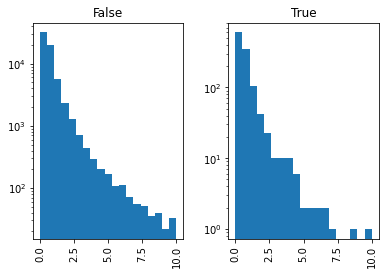

In [21]:
axs = df['Fintwide'].hist(by=df['positive_alpha'],bins=np.linspace(0,10,20))

##When we made the histogram plot, it returned a list of Axes
##objects. We can use the attribute set_yscale to change to a
##log scale to make thing clearer
axs[0].set_yscale('log')
axs[1].set_yscale('log')

plt.show()

The flux distributions still look similar at first glance, but splitting data up by certain measurements and checking the differences can tell us about the physical processes happening in the radio galaxies we are looking at. In this case, the emission mechanism is something called *synchrotron* radiation, which gives rise to a spectral index of around -0.8. Further processes in the galaxies themselves are changing the spectral index to something more positive.

## <font color='blue'>Exercise 2.4<font>
Make a new column called `above_mean`, where you test whether `alpha` is above the mean of `alpha` by using the `np.mean` function. Then plot histograms of `Fintwide` grouped by `above_mean`

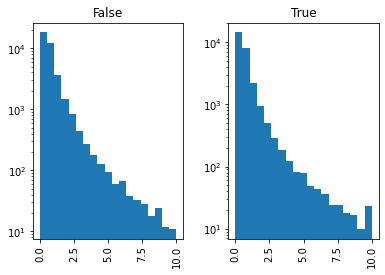

In [22]:
##Create a new column, called 'above_mean', where that column
##is True when alpha > mean(alpha), and False otherwise. Acheive this by
##creating an array of booleans using the greater than > operator
df['above_mean'] = df['alpha'] > np.mean(df['alpha'])

axs = df['Fintwide'].hist(by=df['above_mean'],bins=np.linspace(0,10,20))

##When we made the histogram plot, it returned a list of Axes
##objects. We can use the attribute set_yscale to change to a
##log scale to make thing clearer
axs[0].set_yscale('log')
axs[1].set_yscale('log')

plt.show()

## SED of a radio source
The spectral energy distribution (SED) of a radio source, how bright it appears as a function of frequency, usually follows a power law (because synchrotron radiation follows a power law). Let's plot the SED of the first source in the catalogue. We'll learn a few `pandas`, `numpy`, and `matplotlib` tricks along the way.

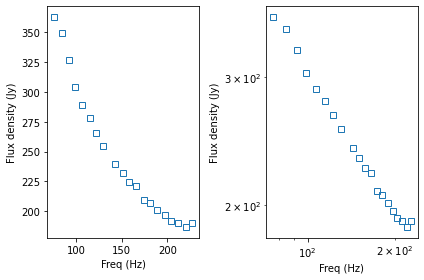

In [23]:
import matplotlib.pyplot as plt

##Sort the data frame by how bright the sources are
##(the column 'Fintwide'), with brightest first (so
##we set ascending=False)
df = df.sort_values('Fintwide',ascending=False)

##Make an array of the known frequencies that we have data for
freqs = np.array([76,84,92,99,107,115,122,130,143,151,158,166,174,181,189,197,204,212,220,227])

##Convert the entire data set to a numpy array. We know 
##that the flux values are contiguous by frequency order,
##so by converting to an array we can easily slice the 
##array to grab the data we care about
df_as_array = df.to_numpy()

##The original df contained both strings and float,
##so this numpy array isn't strictly just floats
##We wants floats to do maths to later, so do a
##conversion below

##When indexing a 2D array, the rows are indexed first,
##columns second. We only want the flux columns here.
##The : in the first index selects all rows
##The second index 7:27 part is a slice, and returns from the 8th 
##column, all the way up to the 27th column, which are
##the flux values (eg Fint076, Fint084, etc)
spectrum_array = np.array(df_as_array[:,7:27],dtype=float)

##Spectrum array now only has 20 columns of flux values
##Select the first row to do some plotting with
spectrum1 = spectrum_array[0,:]

##Setup a figure and subplots, with one row
##and two columns. This returns two Axes
##objects in a list, that you can index and call
fig, axs = plt.subplots(1,2)

##Plot the data on the left axes
axs[0].plot(freqs,spectrum1,'s',mfc='none')

##Plot the data on a log-log plot
axs[1].loglog(freqs,spectrum1,'s',mfc='none')

##ALWAYS add axes labels so we know what we're
##looking at:
for ax in axs:
    ax.set_xlabel('Freq (Hz)')
    ax.set_ylabel('Flux density (Jy)')

plt.tight_layout()
plt.show()


We can see from the two plots that a power law looks like a linear replationship when plotted on a log-log plot. This is because of the logarithm rules, which mean that $\log(S_0\nu^\alpha) = \log(S_0) + \alpha log(\nu)$.

## <font color='blue'>Excercise 2.5<font>
CHALLENGE TIME

Let's use a technique we learned in the last notebook, and fit an SED!. For the first 100 brightest sources, fit a power-law to the spectrum using `lmfit`. You already have the array called `spectrum_array`, so you just need to loop over the first 100 sources in that. I've included the power-law model you need to import in the box below. Try googling "lmfit PowerLawModel" to find out what the variable names are (looking things up on the internet is your coding friend).
    
Once you've calculated 100 of your own spectral indexes, compare them to the original values in `df['alpha']`. Make plots to compare the catalogue numbers to your own. They should be similar, but they won't be the same. Can you figure out why? If you have enough compute power, trying calculating more than 100 SI

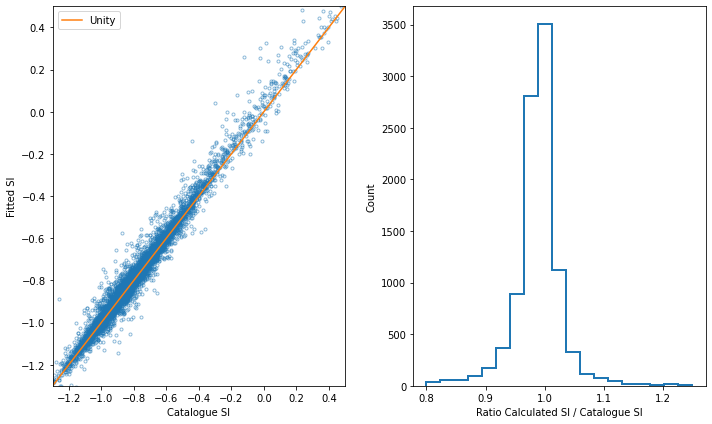

In [55]:
from lmfit.models import PowerLawModel

##Make the lmfit power-law model
pl_model = PowerLawModel(prefix='pl_')

##This makes a Parameter Class that we can then act upon
pl_params = pl_model.make_params()

##Setup an empty list to contain the calculated SI
calc_SIs = []

##Set how many SI we want to calculate
SI_calc_number = 10000

##np.arange here makes an array starting with 0,
##up to the number pass as an argument
for ind in np.arange(SI_calc_number):
    ##Select the fluxes for the row we want to process
    spectrum = spectrum_array[ind,:]
    
    ##Set guesses for the power-law parameters
    ##Synchrotron emission gives SI=-0.8 so that's
    ##a good guess. Doing it inside the loop resets it
    ##for every fit
    pl_params['pl_amplitude'].set(value=1.0)
    pl_params['pl_exponent'].set(value=-0.8)
    
    ##Do the fit
    pl_fit = pl_model.fit(spectrum, pl_params, x=freqs)

    ##Grab the value of the fitted SI and append to a list
    SI = pl_fit.params['pl_exponent'].value
    calc_SIs.append(SI)

##Make two side by side Axes, on a Figure which is 10 inches
##wide, 6 inches tall
fig, axs = plt.subplots(1,2,figsize=(10,6))

##This slice grabs the catalogue SI that we want to compare to
compare_alphas = df['alpha'][:SI_calc_number]

##Plot the catalogue alphas against our own calculations
axs[0].plot(compare_alphas,calc_SIs,'C0.',mfc='none',alpha=0.5)

##Set up a couple of lists so that we can plot x = y
##on the left-hand plot, which should hold true
##if we have calculated alpha well
xline = [compare_alphas.min(), compare_alphas.max()]
yline = [compare_alphas.min(), compare_alphas.max()]
axs[0].plot(xline,yline,'C1-',label='Unity')

##Add a legend so we know what the orange (C1) line is
axs[0].legend()

##ADD LABELS
axs[0].set_xlabel('Catalogue SI')
axs[0].set_ylabel('Fitted SI')

##Set a range over the plot so we can see the scatter
##about unity clearlt
axs[0].set_xlim(-1.3,0.5)
axs[0].set_ylim(-1.3,0.5)

##Plot a histogram of the ratios of our calculated
##SI vs the catalogue SI
##Manually set the bins using np.linspace

axs[1].hist(np.array(calc_SIs) / compare_alphas,bins=np.linspace(0.8,1.25,20),histtype='step',lw=2.0)
axs[1].set_xlabel('Ratio Calculated SI / Catalogue SI')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()